Analisis de datos

Tarea 5 - Algoritmos de Aprendizaje no Supervisado

Presentado por:

Deibin Andrey Rojas Tellez

Grupo: 55

Tutor: Handry Orozco

UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA

Noviembre - 2024

* Regresión Logística - Titanic

1. Realizar un análisis exploratorio de los datos para identificar 
relaciones entre variables, valores atípicos, tendencias, etc. 
2. Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesario. 
3. Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de características. 
4. Dividir el dataset en Train y Test para evaluar correctamente el 
modelo. 
5. Entrenar el modelo configurando 
los
diferentes hiperparámetros. 
6. Evaluar el desempeño del modelo en el conjunto de Test con 
métricas como precisión, recall, F1-score, etc. 
7. Realizar las diferentes gráficas que permitan visualizar los 
resultados del modelo. 
8. Interpretar, analizar y documentar los resultados obtenidos 

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# librerías 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

1.  Realizar un análisis exploratorio de los datos para identificar 
relaciones entre variables, valores atípicos, tendencias, etc. 

In [28]:
df = pd.read_csv('Titanic-Dataset.csv')

In [31]:
df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [33]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


El dataset del Titanic contiene 
* PassengerId: Identificador único de cada pasajero.
* Survived: Variable objetivo (0 = No sobrevivió, 1 = Sobrevivió).
* Pclass: Clase del pasajero (1 = Primera, 2 = Segunda, 3 = Tercera).
* Name: Nombre del pasajero.
* Sex: Género del pasajero.
* Age: Edad del pasajero.
* SibSp: Número de hermanos o cónyuges a bordo.
* Parch: Número de padres o hijos a bordo.
* Ticket: Número del boleto.
* Fare: Tarifa pagada.
* Cabin: Número de cabina asignado.
* Embarked: Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).

In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos de la edad')

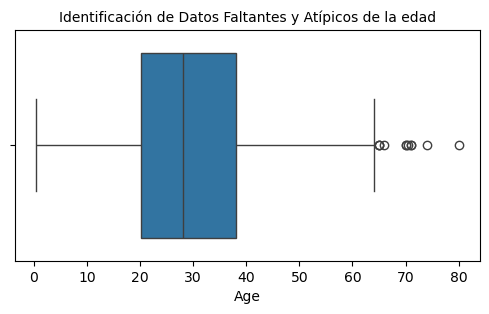

In [38]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos de la edad', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos de la Tarifa')

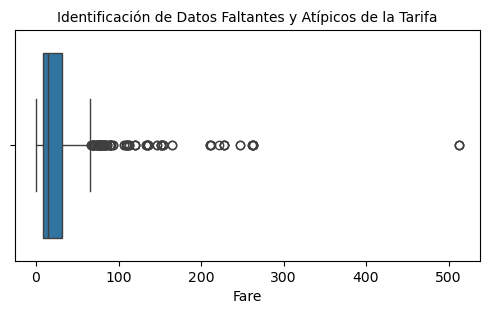

In [40]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['Fare'])
plt.title('Identificación de Datos Faltantes y Atípicos de la Tarifa', fontsize=10 )

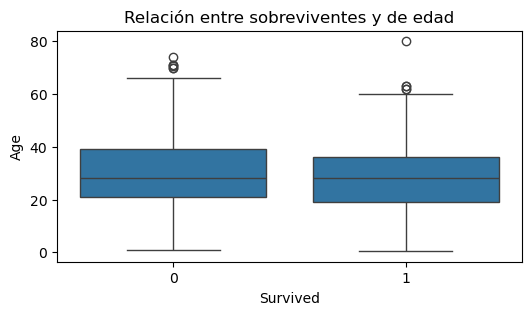

In [42]:
#Analisis de la relación entre la variable 'Survived' y 'Age'
plt.figure(figsize=(6, 3))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Relación entre sobreviventes y de edad')
plt.show()

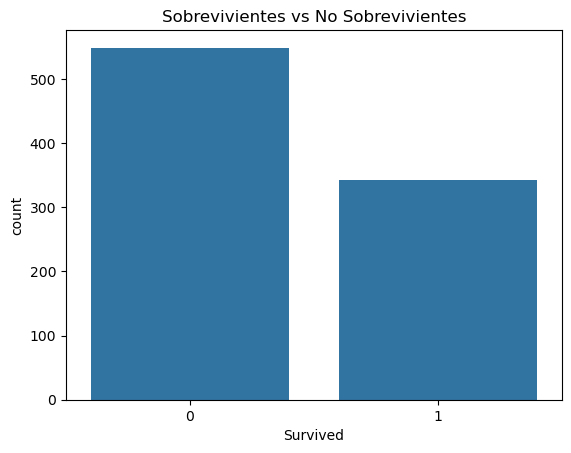

In [44]:
sns.countplot(x='Survived', data=df)
plt.title('Sobrevivientes vs No Sobrevivientes')
plt.show()

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [47]:
# Identificar columnas con datos faltantes
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [49]:
# Reemplazar valores de genero a numericos
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

In [51]:
# Imputar valores faltantes para 'Embarked' con el valor más frecuente
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [53]:
# Imputar valores faltantes para 'Age' con la mediana
df['Age'].fillna(df['Age'].median(), inplace=True)

In [55]:
# Convertir la variable 'Embarked' en variables dummies (código binario)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [57]:
#Elimino datos irrelevantes
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [59]:
#verificamos
print(df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [61]:
print(df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0  53.1000       False        True
4         0       3    0  35.0      0      0   8.0500       False        True


3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Característica de interes:

Identificar si la persona sobrevivio o no (0 = no sobrevivio y si es 1 = si sobrevivio)

In [65]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [67]:
df[['Survived']].head(50)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [70]:
X = df.drop('Survived',axis=1) 
Y = df['Survived'] 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [72]:
print (X_train)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
671       1    0  31.0      1      0  52.0000       False        True
417       2    1  18.0      0      2  13.0000       False        True
634       3    1   9.0      3      2  27.9000       False        True
323       2    1  22.0      1      1  29.0000       False        True
379       3    0  19.0      0      0   7.7750       False        True
..      ...  ...   ...    ...    ...      ...         ...         ...
131       3    0  20.0      0      0   7.0500       False        True
490       3    0  28.0      1      0  19.9667       False        True
528       3    0  39.0      0      0   7.9250       False        True
48        3    0  28.0      2      0  21.6792       False       False
80        3    0  22.0      0      0   9.0000       False        True

[668 rows x 8 columns]


In [74]:
print (Y_train)

671    0
417    1
634    0
323    1
379    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 668, dtype: int64


5. Entrenar el modelo configurando los diferentes hiperparámetros

In [77]:
#modelo de regresion logistica
modelo_regresion = LogisticRegression(solver = "liblinear") 
modelo_regresion.fit (X_train , Y_train)   

#modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) 

In [79]:
print (Y_test)

288    1
869    1
182    0
684    0
599    1
      ..
882    0
434    0
304    0
500    0
633    0
Name: Survived, Length: 223, dtype: int64


In [81]:
print (Prediccion)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0
 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0]


6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [84]:
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       137
           1       0.77      0.65      0.70        86

    accuracy                           0.79       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.79      0.79      0.79       223



7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

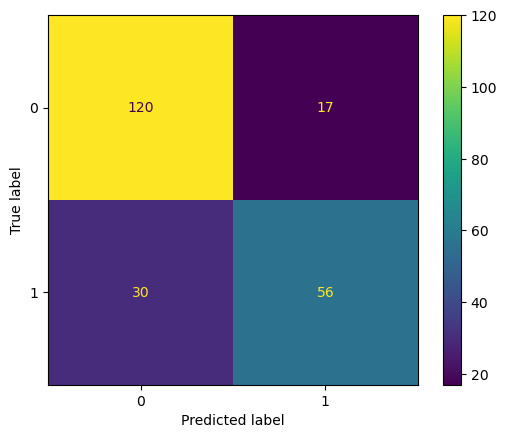

In [87]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

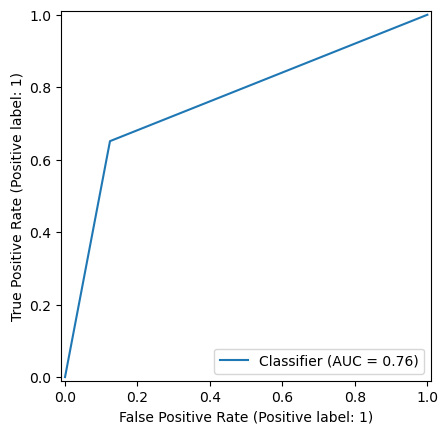

In [89]:
#curva de precisión 
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

8. Interpretar, analizar y documentar los resultados obtenidos

Del desempeño del modelo podemos describir:

* La precisión se define como la proporción de predicciones positivas correctas en relación con todas las predicciones positivas emitidas por el modelo.
Para la clase 'Survived', la precisión es del 0.77, lo que indica que el 77% de los casos identificados como sobrevivientes del modelo resultaron ser correctos.

* El Recall o la tasa de verdaderos positivos, representa la proporción de instancias positivas reales que fueron identificadas correctamente por el modelo entre todas las instancias positivas reales en el conjunto de datos.
En el caso de la clase 'Survived', el Recall es del 0.65, lo que significa que el modelo identificó correctamente al 65%  de los pasajeros del titanic fueron los que realmente sobrevivieron

* El F1 Score, es una medida que combina precisión y recall en una sola métrica, proporciona una evaluación equilibrada del desempeño del modelo.
Para la clase 'Survived', el F1 Score es de 0.70, lo que refleja un el modelo tiene un desempeño aceptable demostrando una buena capacidad del modelo para identificar y clasificar a quienes sobrevivieron

De la Matriz de Confusión podemos inferir:

* Verdaderos negativos: Representan el número de observaciones que el clasificador predijo correctamente como falsas, con un total de 120 casos.
* Verdaderos positivos: Corresponden al número de observaciones que el clasificador predijo correctamente como verdaderas, contabilizando 56 casos correctamente identificados.
* Falsos positivos: Indican el número de observaciones que el clasificador predijo incorrectamente como verdaderas cuando en realidad eran falsas, con un total de 17 casos erróneos. 
* Falsos negativos: Reflejan el número de observaciones que el clasificador predijo incorrectamente como falsas cuando en realidad eran verdaderas, sumando un total de 30 casos mal clasificados.

De la Curva de Precisión del modelo podemos interpretar:
El AUC (Área Bajo la Curva) es de 0.76, lo que indica que el 76% de las predicciones del clasificador son correctas en todos los umbrales de clasificación.